# Final project


You are a team of data scientists and ML engineers working for a recipe website.

Your friend follows a high-protein diet and does not eat any carbohydrates (no grains, no fruits). You claim that a balanced diet should contain all nutrients but should be low in calories. Both of you quickly realize that most of what you know about nutrition comes from mainstream and social media.


Your team's job is to build a model that calssifies whether a nutirtional content is either of the below three catgories
- Criteria for **"Nourishing"**: High in protein and/or fiber, low in saturated fat and sugar, not excessively high in calories.
- Criteria for **"Indulgent"**: High in sugars or saturated fats, very low in beneficial nutrients like protein and fiber, or very high in calories.
- **"Balanced"** is for foods that fall between "Nourishing" and "Indulgent".


# Data

You are provided train and test datasets with the target value as **"Health Category"**

This data contains the calorie content of 7,793 common foods, as well as their nutritional composition. Each row represents one food item, and nutritional values ​​are based on a 100g serving. Here is a description of the columns:

- **FDC_ID** : A unique identifier for each food item in the database.
- **Item** : The name or description of the food product.
- **Category** : The category or classification of the food item, such as "Baked Products" or "Vegetables and Vegetable Products".
- **Calories** : The energy content of the food, presented in kilocalories (kcal).
- **Protein** : The protein content of the food, measured in grams.
- **Carbohydrate** : The carbohydrate content of the food, measured in grams.
- **Total fat** : The total fat content of the food, measured in grams.
- **Cholesterol** : The cholesterol content of the food, measured in milligrams.
- **Fiber** : The dietary fiber content of the food, measured in grams.
- **Water** : The water content of the food, measured in grams.
- **Alcohol** : The alcohol content of the food (if any), measured in grams.
- **Vitamin C** : The Vitamin C content of the food, measured in milligrams.
- **Health Category** : Categorizing the nutitonal contents  


# Project Delivarables
 1. Investigate and experiment with different classification models using the training data. This involves assessing various algorithms to determine the most suitable option based on our dataset's characteristics. (Save the model weights)
 2. Emphasize a thorough exploration and understanding of the dataset. 
 3. EDA
 4. Provide a detailed explanation of the strategies implemented to address issues related to missing values and imbalanced datasets.
 5. Feature Engineering
 6. A function to test your model at the end of your jupyter notebook

 

## Evaluation 
1. Each team is required to save the predictions from their best model on the test data and submit a CSV file containing a single column of predictions, labeled "predictions". This file should reflect the outcomes generated by your most effective model.
2. I will evaluate your predictions against the actual test set to determine the F1 scores. The F1 score, a measure of a model's accuracy, balances precision and recall, providing a comprehensive assessment of performance.
3. The team whose model performs better wins. Each member of the winning team gets to drop their lowest homework grade.

# Submission:
- The notebook must contain the `predict()` function.
- Each team should submit the following
    - Model pickel file
    - Single Jupyter Notebook in HTML and ipynb format
    - Complete Report in PDF
    - Presentation deck 


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, KFold
import pickle



In [5]:
df= pd.read_csv('train_df.csv')
df.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0 mg,11.3,9.31 g,0.0 g,12.0 mg,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0 mg,0.0,62.64 g,0.0 g,0.0 mg,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0 mg,0.7,88.52 g,0.0 g,5.8 mg,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0 mg,0.0,67.93 g,0.0 g,0.0 mg,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0 mg,1.0,89.1 g,NaN,61.0 mg,Indulgent


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FDC_ID           1558 non-null   int64  
 1   Item             1558 non-null   object 
 2   Category         1558 non-null   object 
 3   Calories         1558 non-null   float64
 4   Protein          1558 non-null   float64
 5   Carbohydrate     1558 non-null   float64
 6   Total fat        1558 non-null   float64
 7   Cholesterol      1490 non-null   object 
 8   Fiber            1448 non-null   float64
 9   Water            1558 non-null   object 
 10  Alcohol          1091 non-null   object 
 11  Vitamin C        1480 non-null   object 
 12  Health Category  1558 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 158.4+ KB


In [7]:
def cleaning_data(data):# Cleaning data
    columns_to_replace = ['Cholesterol', 'Water', 'Alcohol', 'Vitamin C']
    data[columns_to_replace]=data[columns_to_replace].replace('mg|g',"",regex=True).apply(pd.to_numeric)
    return data
cleaned_df = cleaning_data(df)

In [8]:
cleaned_df.shape

(1558, 13)

In [9]:
cleaned_df.dtypes

FDC_ID               int64
Item                object
Category            object
Calories           float64
Protein            float64
Carbohydrate       float64
Total fat          float64
Cholesterol        float64
Fiber              float64
Water              float64
Alcohol            float64
Vitamin C          float64
Health Category     object
dtype: object

In [10]:
#find duplicates
cleaned_df.duplicated().sum()

0

In [11]:
#Find Missing values
cleaned_df.isna().sum()

FDC_ID               0
Item                 0
Category             0
Calories             0
Protein              0
Carbohydrate         0
Total fat            0
Cholesterol         68
Fiber              110
Water                0
Alcohol            467
Vitamin C           78
Health Category      0
dtype: int64

# **EDA**

In [12]:
numerical_columns =[column for column in cleaned_df.columns if cleaned_df[column].dtype != 'O']
categorical_columns =[column for column in cleaned_df.columns if cleaned_df[column].dtype == 'O']

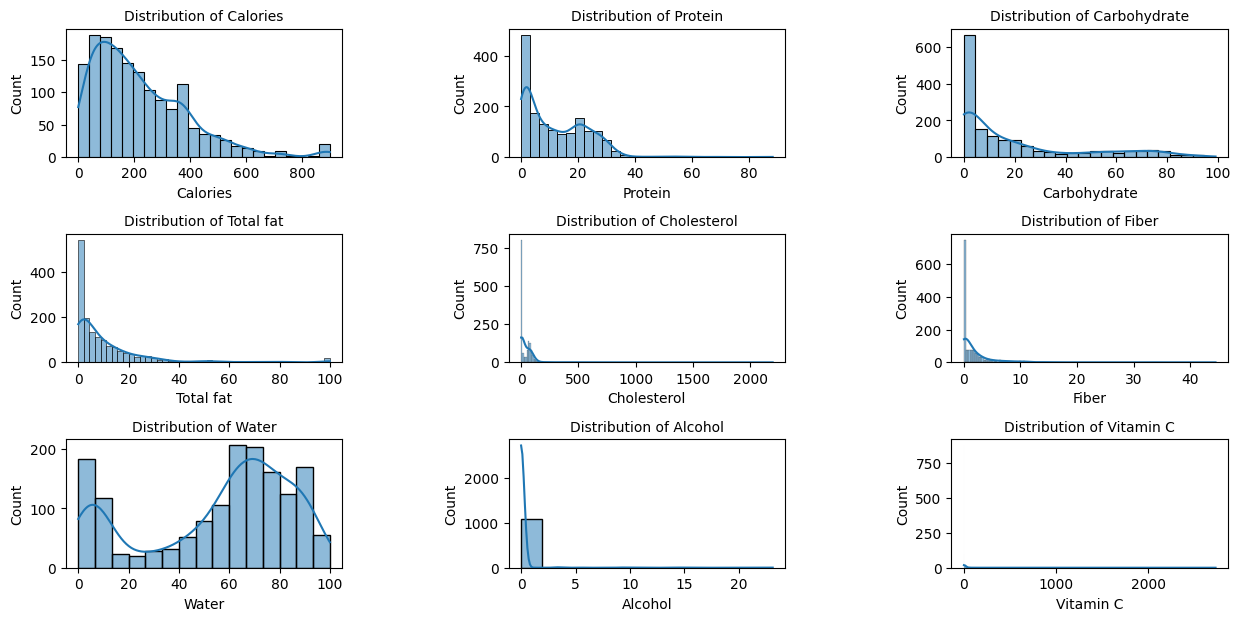

In [13]:
## UNIVARIATE PLOTS
figure,axes= plt.subplots(3,3,figsize =(15,7))
figure.subplots_adjust(hspace=0.6, wspace=0.6)
for i,column in enumerate(numerical_columns[1:]):
    sns.histplot(cleaned_df[column],kde=True,ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}',fontsize =10)

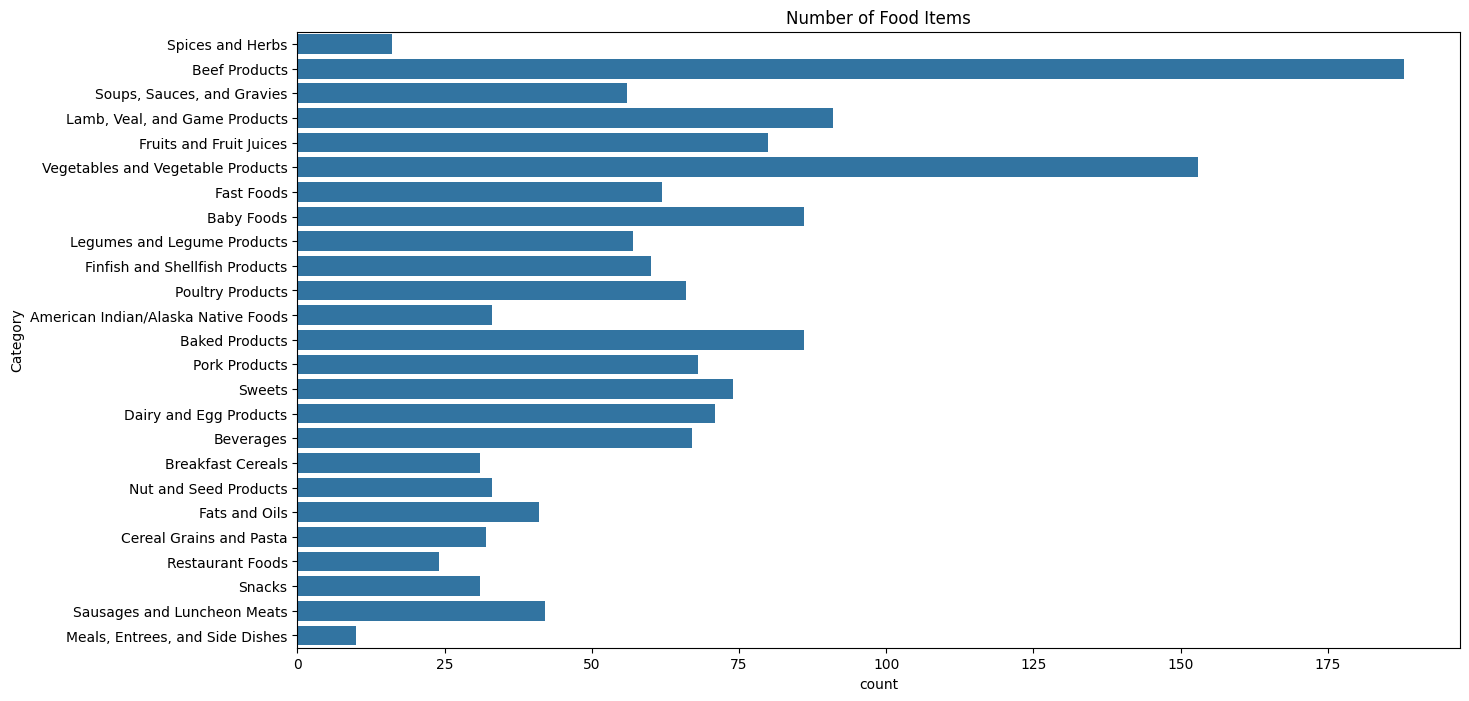

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(cleaned_df['Category'])
plt.title('Number of Food Items')
plt.show()

Beef Product and Vegetable & Vegetable Product has high count in this Category (food items)

<Axes: xlabel='count', ylabel='Health Category'>

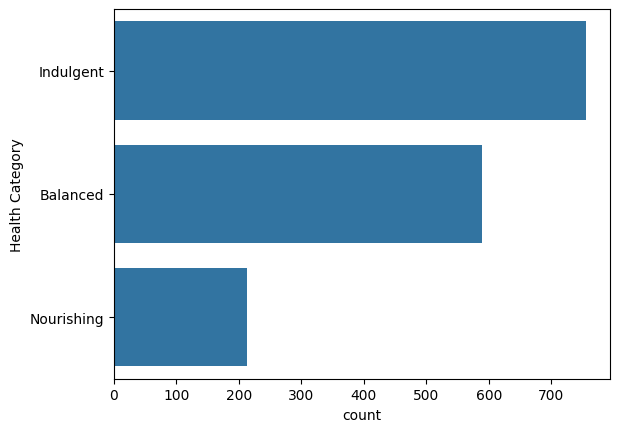

In [15]:
sns.countplot(cleaned_df['Health Category'])

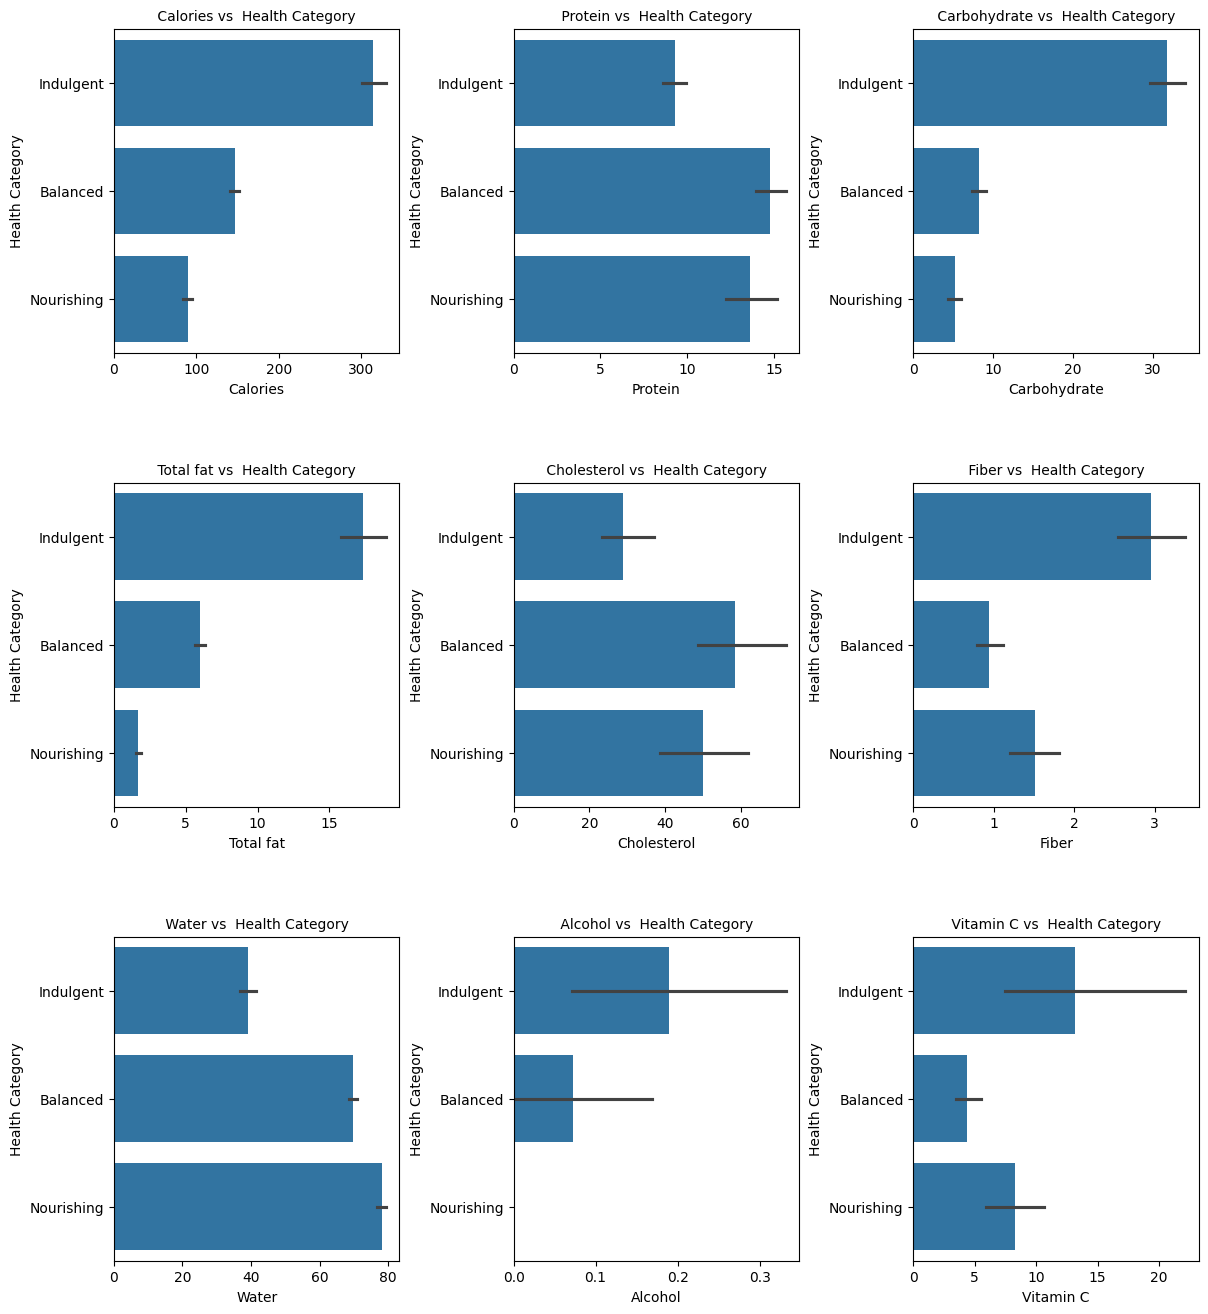

In [16]:
#Bivariate plots
# Numerical

fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(14, 16))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

axes = axes.flatten()
for i,column in enumerate(numerical_columns[1:]):
    sns.barplot(data=cleaned_df,x=column,y='Health Category',ax=axes[i],)
    axes[i].set_title(f' {column} vs  Health Category ',fontsize =10)

1. **Calories**: Indulgent foods tend to be higher in calories, while nourishing foods are lower.
2. **Protein**: Protein-rich foods are associated with balanced and nourishing categories.
3. **Carbohydrates**: Balanced foods have moderate carbohydrate levels, while indulgent foods are higher.
4. **Total Fat**: Nourishing foods have lower fat content, while indulgent foods are higher.
5. **Cholesterol**: Indulgent foods tend to have more cholesterol.
6. **Fiber**: Nourishing foods are rich in fiber.
7. **Water**: Hydrating foods fall under the nourishing category.
8. **Alcohol**: Indulgent foods may contain alcohol.
9. **Vitamin C**: Nourishing foods are vitamin C-rich.

<Axes: >

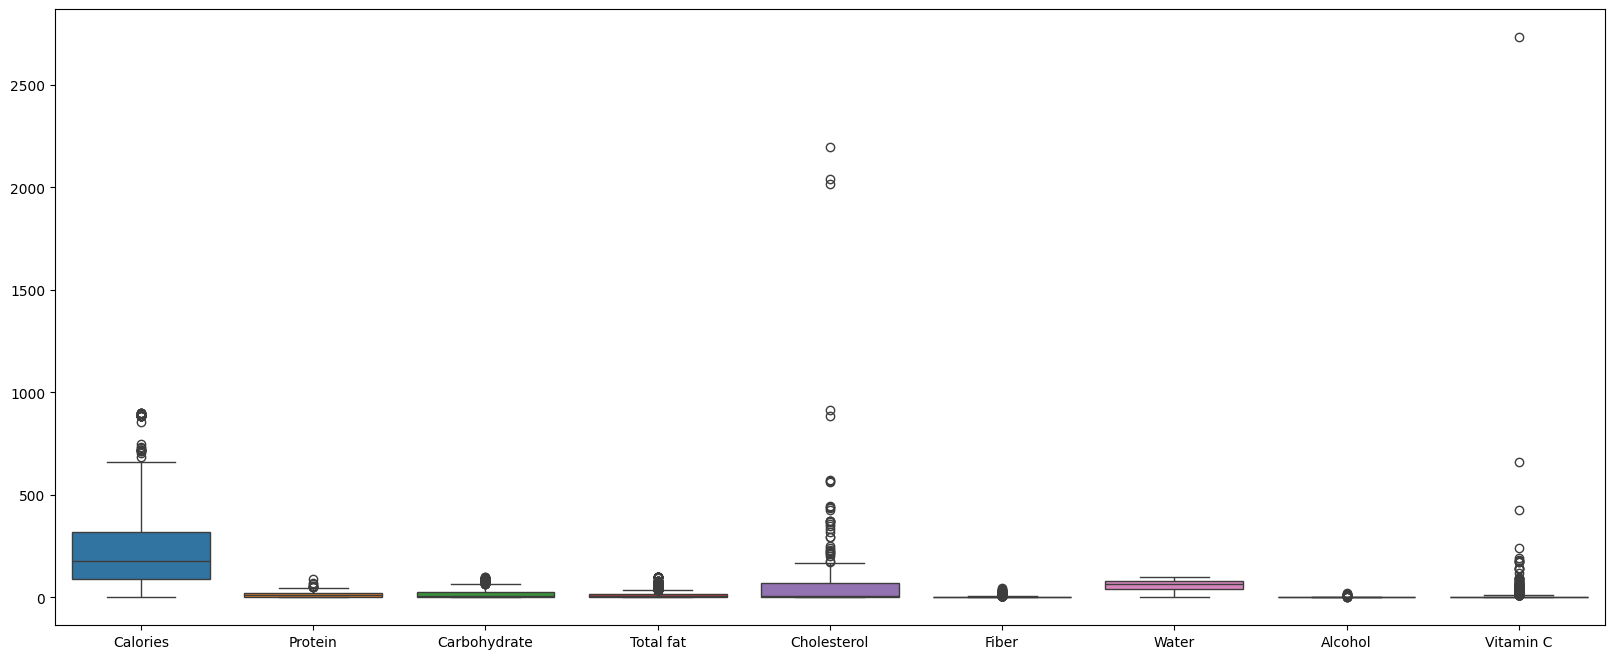

In [17]:
plt.figure(figsize = (20,8))
sns.boxplot(cleaned_df[numerical_columns[1:]])


By visualizing the box plot, We detect that there are some EXTREME outliers present in the Nutrient content like Cholesterol. We try to remove this outlier by statisically.

<Figure size 1500x1000 with 0 Axes>

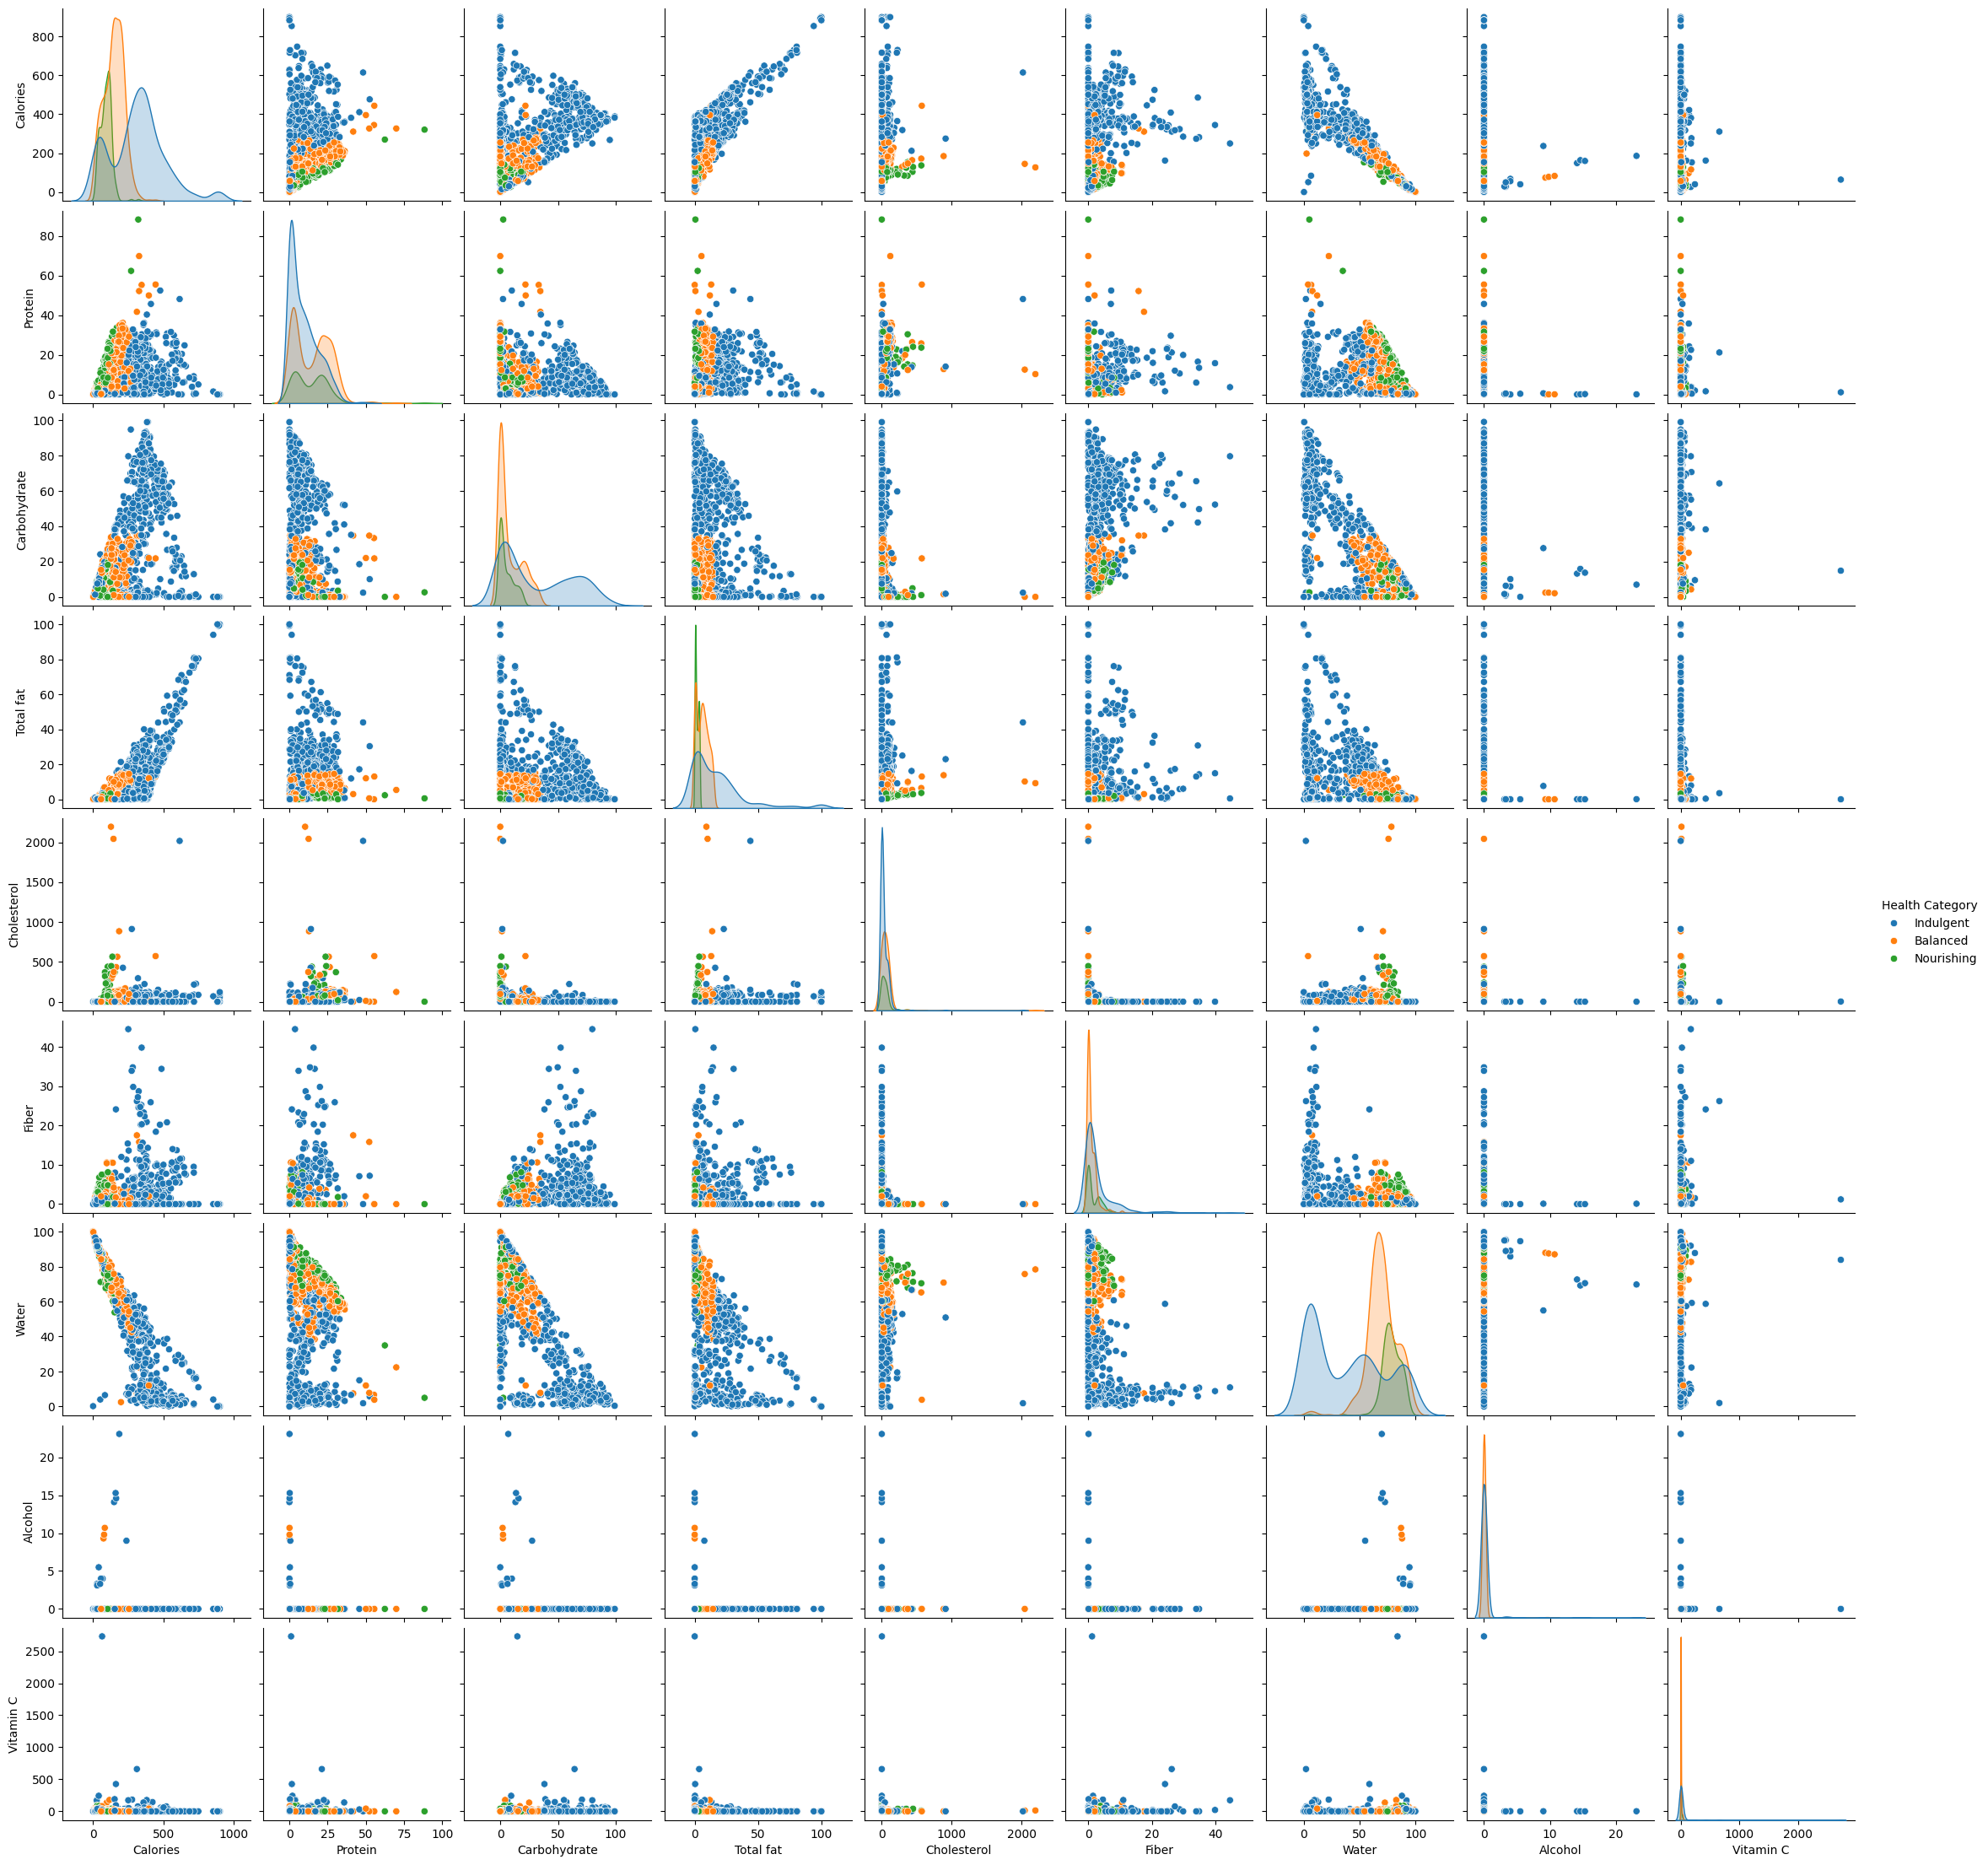

In [18]:
plt.figure(figsize=(15,10))
sns.pairplot(cleaned_df.iloc[:, 1:], hue = 'Health Category')
plt.show()

<Axes: >

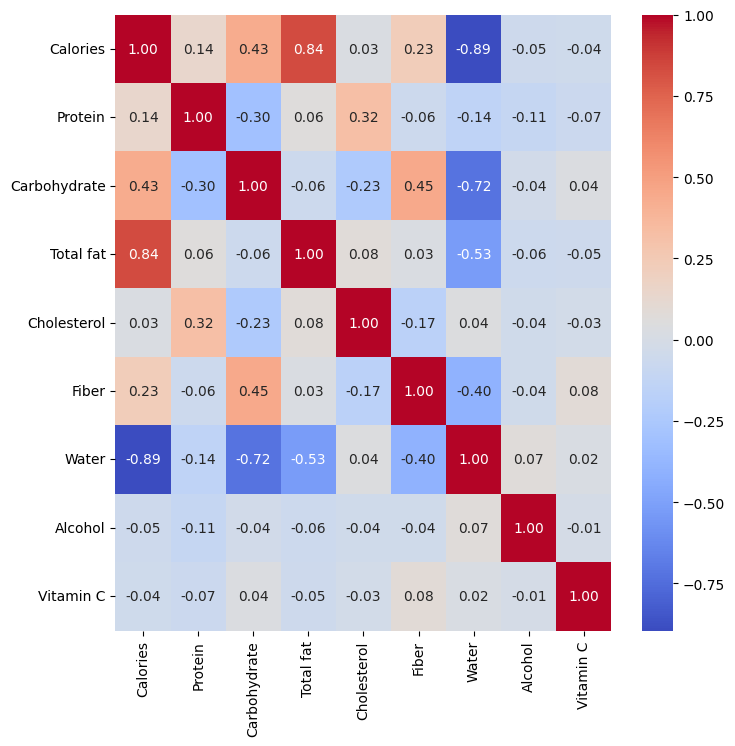

In [19]:
df_1=cleaned_df.drop(columns=['FDC_ID','Item','Category','Health Category'])
plt.figure(figsize=(8, 8))
sns.heatmap(df_1.corr(),annot=True, cmap='coolwarm', fmt=".2f")

In [20]:
cleaned_df.describe()

,FDC_ID,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1490.000000,1448.000000,1558.000000,1091.000000,1480.000000
mean,171395.051990,220.541720,11.953806,19.226341,10.912991,43.011409,2.023135,56.042908,0.121357,9.166959
std,2215.343862,170.851821,10.778995,25.274504,16.602603,113.204632,4.263749,29.685042,1.228915,76.165746
min,167515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,169531.250000,88.250000,2.182500,0.000000,0.800000,0.000000,0.000000,38.000000,0.000000,0.000000
50%,171382.500000,179.000000,9.055000,7.600000,5.100000,7.000000,0.200000,64.590000,0.000000,0.000000
75%,173350.500000,319.000000,20.495000,26.570000,13.972500,69.000000,2.200000,78.300000,0.000000,3.500000
max,175293.000000,900.000000,88.320000,99.100000,100.000000,2195.000000,44.500000,100.000000,23.100000,2732.000000


# **Data Preprocessing**

In [21]:
def imputation(data):#Handling Missing Value
    fill_cholesterol = SimpleImputer(missing_values=np.nan, strategy='mean')
    fill_fiber = SimpleImputer(missing_values=np.nan, strategy='mean')
    fill_alcohol = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    fill_vitamin_c = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    data['Cholesterol'] = fill_cholesterol.fit_transform(data[['Cholesterol']])
    data['Fiber'] = fill_fiber.fit_transform(data[['Fiber']])
    data['Alcohol'] = fill_alcohol.fit_transform(data[['Alcohol']])
    data['Vitamin C'] = fill_vitamin_c.fit_transform(data[['Vitamin C']])
    return data
imputed_data = imputation(cleaned_df)

In [22]:
def outlier(data):#Handling outlier
    Q1 = data[numerical_columns].quantile(0.01)
    Q3 = data[numerical_columns].quantile(0.99)
    IQR = Q3 -Q1
    
    data_filtered = data[~((data[numerical_columns] < (Q1 - 1.5 * IQR)) |(data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)].reset_index(drop=True)
    
    return data_filtered  
filtered_data = outlier(imputed_data)

In [23]:
filtered_data.shape

(1535, 13)

In [80]:
filtered_data.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,...,Total fat_levels,Cholesterol_levels,Fiber_levels,Water_levels,Alcohol_levels,Vitamin C_levels,Calorie Density (kcal/g),Total Nutrient Content (g),Saturated Fat,Sugar
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0,11.3,9.31,...,0,0,0,0,0,0,3.07,115.32,0.753,32.795
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,...,0,0,0,1,0,0,2.38,170.12,1.844,0.175
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,...,0,0,0,1,0,0,0.47,106.44,0.106,4.270
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,...,0,0,0,1,0,0,1.87,163.33,1.143,0.000
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0,1.0,89.10,...,0,0,0,1,0,0,0.38,161.52,0.004,4.810


In [25]:
filtered_data.isna().sum()

FDC_ID             0
Item               0
Category           0
Calories           0
Protein            0
Carbohydrate       0
Total fat          0
Cholesterol        0
Fiber              0
Water              0
Alcohol            0
Vitamin C          0
Health Category    0
dtype: int64

In [26]:
# Data Transformation
def transform_data(data):
    for col in numerical_columns[1:]:
        data[f'{col}_levels'] = pd.cut(x = data[col],bins= 2, labels= [0,1]).astype(int)
    data['Calorie Density (kcal/g)'] = data['Calories'] / 100
    nutrient_columns = ['Protein', 'Carbohydrate', 'Total fat', 'Cholesterol', 'Fiber', 'Water', 'Alcohol', 'Vitamin C']
    data['Total Nutrient Content (g)'] = data[nutrient_columns].sum(axis=1)
    data['Saturated Fat'] = data['Total fat'] * 0.1  # Assume 10% of total fat is saturated fat
    data['Sugar'] = data['Carbohydrate'] * 0.5 # Assume 50% of carbohydrates are sugars 
    df_encoded = pd.get_dummies(data['Category']).astype(bool).astype(int)
    df_final = pd.concat([data, df_encoded], axis=1).drop('Category', axis = 1)
    df_final = df_final.drop(['FDC_ID','Item'], axis=1)
    return df_final
new_df = transform_data(filtered_data)  

In [27]:
new_df.iloc[:,0:21]

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Health Category,...,Protein_levels,Carbohydrate_levels,Total fat_levels,Cholesterol_levels,Fiber_levels,Water_levels,Alcohol_levels,Vitamin C_levels,Calorie Density (kcal/g),Total Nutrient Content (g)
0,307.0,9.59,65.59,7.53,0.0,11.300000,9.31,0.0,12.0,Indulgent,...,0,1,0,0,0,0,0,0,3.07,115.320000
1,238.0,17.69,0.35,18.44,71.0,0.000000,62.64,0.0,0.0,Indulgent,...,0,0,0,0,0,1,0,0,2.38,170.120000
2,47.0,0.82,8.54,1.06,1.0,0.700000,88.52,0.0,5.8,Indulgent,...,0,0,0,0,0,1,0,0,0.47,106.440000
3,187.0,20.97,0.00,11.43,63.0,0.000000,67.93,0.0,0.0,Balanced,...,0,0,0,0,0,1,0,0,1.87,163.330000
4,38.0,0.76,9.62,0.04,0.0,1.000000,89.10,0.0,61.0,Indulgent,...,0,0,0,0,0,1,0,0,0.38,161.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,57.0,0.22,15.32,0.07,0.0,2.000000,84.13,0.0,1.0,Balanced,...,0,0,0,0,0,1,0,0,0.57,102.740000
1531,131.0,4.00,27.54,0.18,0.0,2.023135,67.91,0.0,0.0,Balanced,...,0,0,0,0,0,1,0,0,1.31,101.653135
1532,363.0,0.10,91.80,0.50,0.0,0.100000,5.20,0.0,0.0,Indulgent,...,0,1,0,0,0,0,0,0,3.63,97.700000
1533,255.0,29.20,0.00,14.50,97.0,0.000000,54.30,0.0,0.0,Balanced,...,0,0,0,0,0,1,0,0,2.55,195.000000


In [28]:
#Encoding the Output Variable
def output_encoding(data):
    data['Health Category_encoded'] = data['Health Category'].map({'Nourishing': 0, 'Indulgent': 1, 'Balanced':2})
    final_data = data.drop(['Health Category'], axis=1)
    return final_data
final_df = output_encoding(new_df)

In [29]:
X = final_df.drop(columns=['Health Category_encoded'])
y = final_df['Health Category_encoded']

In [81]:
X.corr().head()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C,Calories_levels,...,Nut and Seed Products,Pork Products,Poultry Products,Restaurant Foods,Sausages and Luncheon Meats,Snacks,"Soups, Sauces, and Gravies",Spices and Herbs,Sweets,Vegetables and Vegetable Products
Calories,1.000000,0.123764,0.431366,0.835958,0.014634,0.219521,-0.894171,NaN,-0.090952,0.713656,...,0.260980,-0.044561,-0.042671,-0.020225,0.045811,0.187198,-0.133403,0.031782,0.133180,-0.306871
Protein,0.123764,1.000000,-0.312548,0.053139,0.504500,-0.063740,-0.127166,NaN,-0.172767,-0.089084,...,0.053825,0.184168,0.227479,-0.050776,0.064742,-0.019738,-0.155969,-0.004522,-0.178631,-0.281242
Carbohydrate,0.431366,-0.312548,1.000000,-0.065605,-0.360271,0.437814,-0.725334,NaN,0.117081,0.177791,...,0.051655,-0.158288,-0.154543,0.014039,-0.109793,0.246762,-0.027682,0.111149,0.334157,-0.099408
Total fat,0.835958,0.053139,-0.065605,1.000000,0.089722,0.027810,-0.524891,NaN,-0.121667,0.745406,...,0.277122,-0.005073,-0.020393,-0.020579,0.101865,0.057909,-0.092458,0.000388,-0.017857,-0.196191
Cholesterol,0.014634,0.504500,-0.360271,0.089722,1.000000,-0.255023,0.083489,NaN,-0.124197,-0.101310,...,-0.094183,0.114948,0.249105,-0.033127,0.096235,-0.084864,-0.096488,-0.065213,-0.114417,-0.205053


There are some constant values, we can element these columns by feature selection

In [33]:
# Feature Selection

sel = VarianceThreshold(threshold=0)
sel_cons= sel.fit_transform(X)
sel_1 = SelectKBest(f_classif, k=20)
X_new = sel_1.fit_transform(sel_cons, y)   


In [37]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1228, 20) (1228,)
(307, 20) (307,)


In [38]:
# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# **Model Training**

In [41]:
def evaluate_model(True_value, Predicted_value):
    Accuracy = accuracy_score(True_value, Predicted_value)
    Class_report = classification_report(True_value, Predicted_value)
    conf_matrix = confusion_matrix(True_value, Predicted_value)
    return Accuracy, Class_report, conf_matrix
    

In [76]:
models ={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest ": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(), 
}

model_list = []
Train_Accuracy_list =[]
Test_Accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate Train and Test dataset
    model_train_accuracy , model_train_class_report, model_train_conf_matrix = evaluate_model(y_train, y_train_pred)

    model_test_accuracy , model_test_class_report, model_test_conf_matrix = evaluate_model(y_test, y_test_pred)

    
    print(model_name)
    model_list.append(model_name)
    
    
    print('Model performance for Training set')
    print("- Train_Accuracy: ",'\n', model_train_accuracy)
   

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Test_Accuracy: ",'\n', model_test_accuracy)
    print("- Classification Report: ",'\n', model_test_class_report)
    print("- Confusion Matrix: ",'\n' ,model_test_conf_matrix)
    Train_Accuracy_list.append(model_train_accuracy)
    Test_Accuracy_list.append(model_test_accuracy)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Train_Accuracy:  
 0.7833876221498371
----------------------------------
Model performance for Test set
- Test_Accuracy:  
 0.8045602605863192
- Classification Report:  
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        39
           1       0.89      0.85      0.87       151
           2       0.74      0.77      0.75       117

    accuracy                           0.80       307
   macro avg       0.78      0.79      0.78       307
weighted avg       0.81      0.80      0.81       307

- Confusion Matrix:  
 [[ 29   0  10]
 [  1 128  22]
 [ 11  16  90]]


Decision Tree
Model performance for Training set
- Train_Accuracy:  
 1.0
----------------------------------
Model performance for Test set
- Test_Accuracy:  
 0.996742671009772
- Classification Report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
     

In [66]:
# Perform Cross-Validation
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

cv_scores_dict = {}
cv_mean =[]
cv_stddev = []


for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
    cv_scores_dict[model_name] = cv_scores
    
    print(f"Model: {model_name}")
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", np.mean(cv_scores))
    print("Standard Deviation of Accuracy:", np.std(cv_scores))
    cv_mean.append(np.mean(cv_scores))
    cv_stddev.append(np.std(cv_scores))
    print('='*35)


Model: Logistic Regression
Cross-Validation Scores: [0.75609756 0.77642276 0.78861789 0.73877551 0.7877551 ]
Mean Accuracy: 0.7695337647254024
Standard Deviation of Accuracy: 0.01934053221480028
Model: Decision Tree
Cross-Validation Scores: [0.96341463 0.97154472 0.98780488 0.9877551  0.97959184]
Mean Accuracy: 0.9780222332835573
Standard Deviation of Accuracy: 0.009468185863373224
Model: Random Forest 
Cross-Validation Scores: [0.97560976 0.96341463 0.99186992 0.9755102  0.9877551 ]
Mean Accuracy: 0.9788319230131076
Standard Deviation of Accuracy: 0.010086837242301852
Model: Gradient Boosting
Cross-Validation Scores: [0.98780488 0.99186992 0.99593496 0.99591837 1.        ]
Mean Accuracy: 0.9943056246889
Standard Deviation of Accuracy: 0.004144247846077974


In [77]:
#Results
pd.DataFrame(list(zip(model_list, Train_Accuracy_list,Test_Accuracy_list ,cv_mean,cv_stddev)), columns=['Model Name','Train_Accuracy','Test_Accuracy', 'CV_mean','CV_Std_Dev'])

,Model Name,Train_Accuracy,Test_Accuracy,CV_mean,CV_Std_Dev
0,Logistic Regression,0.783388,0.804560,0.769534,0.019341
1,Decision Tree,1.000000,0.996743,0.978022,0.009468
2,Random Forest,1.000000,0.993485,0.978832,0.010087
3,Gradient Boosting,1.000000,1.000000,0.994306,0.004144


In [95]:
best_model_index = Test_Accuracy_list.index(max(Test_Accuracy_list))
best_model_name = model_list[best_model_index]
best_model = models[best_model_name]


In [96]:
best_model

GradientBoostingClassifier()

***We can see that Gradient boosting classifier performing well on both training and test dataset. We use gradient boosting classifier model for the Prediction.***

***Our model is performing good, So we dont need to do hyperparameter Tuning***

# Testing with  actual test data

In [111]:

df_actual_test = pd.read_csv("C:/Users/Niranjan kumar/Desktop/SPRING 2023/PREDICTIVE MODEL/FINAL PRJECT UPDATE/Final_project_PredictiveModeling/Project work/actual_test.csv")
df_actual_test.head()


,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0 mg,11.3,9.31 g,0.0 g,12.0 mg
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0 mg,0.0,62.64 g,0.0 g,0.0 mg
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0 mg,0.7,88.52 g,0.0 g,5.8 mg
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0 mg,0.0,67.93 g,0.0 g,0.0 mg
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0 mg,1.0,89.1 g,NaN,61.0 mg


In [112]:
def predict(data):
    cleaned_data_1 = cleaning_data(data)
    imputed_data_1 = imputation(cleaned_data_1)
    new_df_1 = transform_data(imputed_data_1)
    sel_cons_test = sel.transform(new_df_1)
    sel_cons_test_1 = sel_1.transform(sel_cons_test)
    scaled_data_1 = scaler.transform(sel_cons_test_1)
    prediction = best_model.predict(scaled_data_1)
    return prediction
    

In [113]:
predicted = predict(df_actual_test)
print(predicted)
predicted.shape

[1 1 1 ... 1 2 1]


(1558,)

In [114]:
reverse_mapping = {0: 'Nourishing', 1: 'Indulgent', 2: 'Balanced'}
original_values = [reverse_mapping[value] for value in predicted]

df_actual_test['Predictions'] = original_values

df_actual_test.head()

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,...,Cholesterol_levels,Fiber_levels,Water_levels,Alcohol_levels,Vitamin C_levels,Calorie Density (kcal/g),Total Nutrient Content (g),Saturated Fat,Sugar,Predictions
0,171331,"Spices, poultry seasoning",Spices and Herbs,307.0,9.59,65.59,7.53,0.0,11.3,9.31,...,0,0,0,0,0,3.07,115.32,0.753,32.795,Indulgent
1,172162,"Beef, plate steak, boneless, outside skirt, se...",Beef Products,238.0,17.69,0.35,18.44,71.0,0.0,62.64,...,0,0,1,0,0,2.38,170.12,1.844,0.175,Indulgent
2,172920,"Soup, tomato rice, canned, prepared with equal...","Soups, Sauces, and Gravies",47.0,0.82,8.54,1.06,1.0,0.7,88.52,...,0,0,1,0,0,0.47,106.44,0.106,4.270,Indulgent
3,172659,"Lamb, Australian, imported, fresh, leg, bottom...","Lamb, Veal, and Game Products",187.0,20.97,0.00,11.43,63.0,0.0,67.93,...,0,0,1,0,0,1.87,163.33,1.143,0.000,Balanced
4,167754,"Pummelo, raw",Fruits and Fruit Juices,38.0,0.76,9.62,0.04,0.0,1.0,89.10,...,0,0,1,0,0,0.38,161.52,0.004,4.810,Indulgent


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = df['Health Category'].map({'Nourishing': 0, 'Indulgent': 1, 'Balanced':2})

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, predicted)
print("Accuracy:", accuracy)
print(f'Confusion Matrix: ','\n', confusion_matrix(y_true, predicted))
print(f'Classification  Report :','\n',classification_report(y_true, predicted))
print(f'Precision Score :',precision_score(y_true, predicted, average='weighted'))
print(f'Recall Score :',recall_score(y_true, predicted, average='weighted'))
print(f'F1 Score:',f1_score(y_true, predicted, average='weighted'))

Accuracy: 1.0
Confusion Matrix:  
 [[213   0   0]
 [  0 756   0]
 [  0   0 589]]
Classification  Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       756
           2       1.00      1.00      1.00       589

    accuracy                           1.00      1558
   macro avg       1.00      1.00      1.00      1558
weighted avg       1.00      1.00      1.00      1558

Precision Score : 1.0
Recall Score : 1.0
F1 Score: 1.0


In [116]:
col_values_df1 = df['Health Category'].values
col_values_df2 = df_actual_test['Predictions'].values

diff_indices = np.where(col_values_df1 != col_values_df2)[0]

# how many indices vary from original DF
print(diff_indices.shape)

(0,)


# **Testing  with unseen data**

In [117]:

df_test = pd.read_csv("C:/Users/Niranjan kumar/Downloads/test_dataframe.csv")
df_test.head()


,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,169340,"Carrots, canned, no salt added, solids and liq...",Vegetables and Vegetable Products,23.0,0.59,5.36,0.14,0.0 mg,1.8,92.99 g,0.0 g,2.0 mg
1,169408,"Nuts, chestnuts, japanese, dried",Nut and Seed Products,360.0,5.25,81.43,1.24,0.0 mg,NaN,9.96 g,NaN,61.3 mg
2,168917,"Quinoa, cooked",Cereal Grains and Pasta,120.0,4.40,21.30,1.92,0.0 mg,2.8,71.61 g,0.0 g,0.0 mg
3,170656,"Candies, sugar-coated almonds",Sweets,465.0,10.00,68.26,17.93,0.0 mg,2.5,2.3 g,0.0 g,0.0 mg
4,171861,"Rolls, gluten-free, white, made with brown ric...",Baked Products,310.0,7.99,55.10,6.40,NaN,3.6,28.3 g,NaN,NaN


In [118]:
df_test.shape

(6235, 12)

In [119]:
predicted = predict(df_test)
print(predicted)
predicted.shape

[2 1 2 ... 0 2 2]


(6235,)

In [120]:
reverse_mapping = {0: 'Nourishing', 1: 'Indulgent', 2: 'Balanced'}
original_values = [reverse_mapping[value] for value in predicted]

df_test['Prediction'] = original_values

df_test['Prediction'] .to_csv('09_Grad_boost_Pred.csv',index = False)

In [121]:
df_test

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,...,Cholesterol_levels,Fiber_levels,Water_levels,Alcohol_levels,Vitamin C_levels,Calorie Density (kcal/g),Total Nutrient Content (g),Saturated Fat,Sugar,Prediction
0,169340,"Carrots, canned, no salt added, solids and liq...",Vegetables and Vegetable Products,23.0,0.59,5.36,0.14,0.000000,1.800000,92.99,...,0,0,1,0,0,0.23,102.880000,0.014,2.680,Balanced
1,169408,"Nuts, chestnuts, japanese, dried",Nut and Seed Products,360.0,5.25,81.43,1.24,0.000000,1.968096,9.96,...,0,0,0,0,0,3.60,161.148096,0.124,40.715,Indulgent
2,168917,"Quinoa, cooked",Cereal Grains and Pasta,120.0,4.40,21.30,1.92,0.000000,2.800000,71.61,...,0,0,1,0,0,1.20,102.030000,0.192,10.650,Balanced
3,170656,"Candies, sugar-coated almonds",Sweets,465.0,10.00,68.26,17.93,0.000000,2.500000,2.30,...,0,0,0,0,0,4.65,100.990000,1.793,34.130,Indulgent
4,171861,"Rolls, gluten-free, white, made with brown ric...",Baked Products,310.0,7.99,55.10,6.40,45.558604,3.600000,28.30,...,0,0,0,0,0,3.10,146.948604,0.640,27.550,Indulgent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,171640,"Bacon, turkey, low sodium",Sausages and Luncheon Meats,253.0,13.33,4.80,20.00,100.000000,0.000000,58.93,...,0,0,1,0,0,2.53,221.060000,2.000,2.400,Indulgent
6231,175219,"SILK Vanilla, soymilk",Legumes and Legume Products,41.0,2.47,4.12,1.44,0.000000,0.400000,91.32,...,0,0,1,0,0,0.41,99.750000,0.144,2.060,Balanced
6232,168918,"Teff, cooked",Cereal Grains and Pasta,101.0,3.87,19.86,0.65,0.000000,2.800000,74.93,...,0,0,1,0,0,1.01,102.110000,0.065,9.930,Nourishing
6233,169306,"Sweet potato, frozen, unprepared (Includes foo...",Vegetables and Vegetable Products,96.0,1.71,22.22,0.18,0.000000,1.700000,74.89,...,0,0,1,0,0,0.96,114.000000,0.018,11.110,Balanced


In [123]:
#Model Pickle File
with open('09_Grad_Boosting_pred.pkl','wb') as file:
    pickle.dump(best_model,file)